# 逻辑斯蒂回归

## 【关键词】Logistics函数，最大似然估计，梯度下降法

## 1、Logistics回归的原理

利用Logistics回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归” 一词源于最佳拟合，表示要找到最佳拟合参数集。

训练分类器时的做法就是寻找最佳拟合参数，使用的是最优化算法。接下来介绍这个二值型输出分类器的数学原理

Logistic Regression和Linear Regression的原理是相似的，可以简单的描述为这样的过程：

（1）找一个合适的预测函数，一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程是非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有梯度下降法（Gradient Descent）。


### 1)  构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。首先需要先找到一个预测函数（h），显然，该函数的输出必须是两类值（分别代表两个类别），所以利用了*Logistic函数（或称为Sigmoid函数）*，函数形式为：

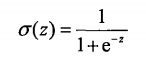

该函数形状为：

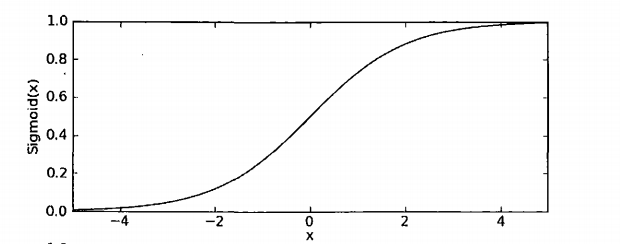

预测函数可以写为：

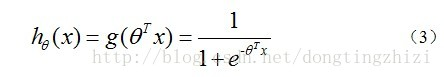

### 2）构造损失函数

Cost函数和J(θ)函数是基于*最大似然估计*推导得到的。

每个样本属于其真实标记的概率，即似然函数，可以写成：

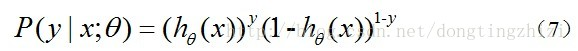

所有样本都属于其真实标记的概率为

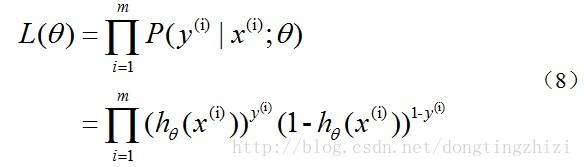

对数似然函数为

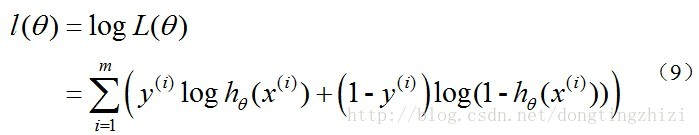

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数

### 3) 梯度下降法求J(θ)的最小值

求J(θ)的最小值可以使用*梯度下降法*，根据梯度下降法可得θ的更新过程:

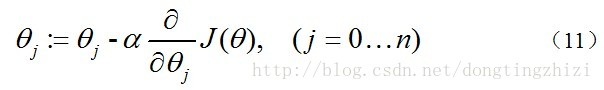

式中为α学习步长，下面来求偏导：

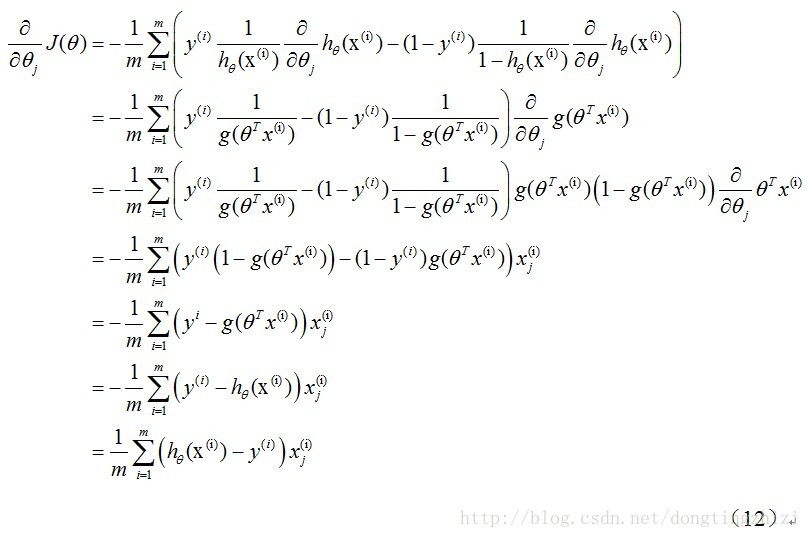

上式求解过程中用到如下的公式：

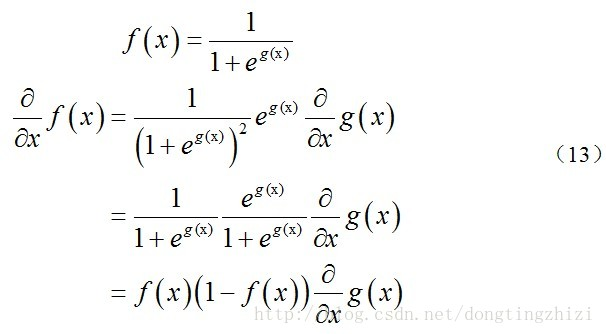

因此，θ的更新过程可以写成:

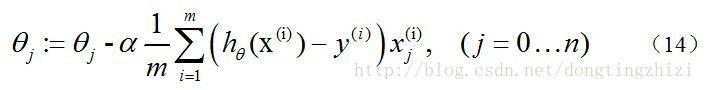

因为式中α本来为一常量，所以1/m一般将省略，所以最终的θ更新过程为：

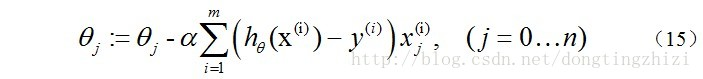

## 2、实战

`
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
`

solver参数的选择：
- “liblinear”：小数量级的数据集
- “lbfgs”, “sag” or “newton-cg”：大数量级的数据集以及多分类问题
- “sag”：极大的数据集

### 1) 手写数字数据集的分类

使用KNN与Logistic回归两种方法

In [25]:
from sklearn.datasets import load_digits

In [27]:
digits = load_digits()

In [46]:
images = digits.images
data = digits.data
target = digits.target

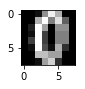

In [37]:
plt.figure(figsize=(1,1))
plt.imshow(images[10],cmap='gray')

In [38]:
images[0].shape

(8, 8)

In [40]:
images[0].ravel().shape

(64,)

In [42]:
data = load_digits().data

In [43]:
data.shape

(1797, 64)

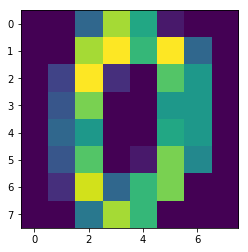

In [44]:
plt.imshow(data[0].reshape(8,8))

导入数据load_digits()

创建模型，训练和预测

In [45]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=1)

In [49]:
# knn logistic 分类模型

(1437, 64)

In [62]:
logistic = LogisticRegression(C=0.1)
logistic.fit(X_train,y_train)
logistic.score(X_test,y_test)

0.975

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9944444444444445

In [69]:
y1_ = knn.predict(X_test)

In [70]:
y2_ = logistic.predict(X_test)

展示结果

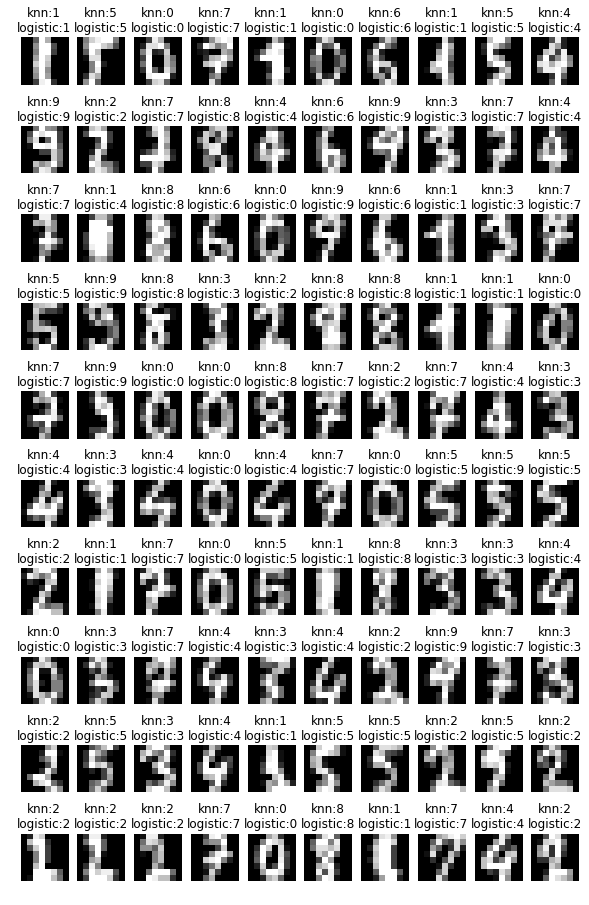

In [79]:
plt.figure(figsize=(10,16))

for i in range(0,10):
    for j in range(1,11):
        ax = plt.subplot(10,10,i*10+j)
        ax.axis('off')
        image_data = X_test[i*10+j-1]
        ax.imshow(image_data.reshape(8,8),cmap='gray')
        t1 = y1_[i*10+j-1]
        t2 = y2_[i*10+j-1]
        title = 'knn:'+str(t1) + '\nlogistic:'+str(t2)
        ax.set_title(title)

### 2) 使用make_blobs产生数据集进行分类

导包使用datasets.make_blobs创建一系列点

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# make_blobs是一个函数，可以创建一个分类样本集
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression

设置三个中心点，随机创建100个点

In [12]:
X_train,y_train = make_blobs(n_samples=150,n_features=2,centers=[[2,6],[4,2],[6,5]])

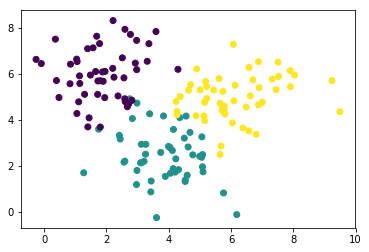

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [6]:
n1 = np.random.random(size=(50,2)) - [2,2]
n2 = np.random.random(size=(50,2)) + [2,2]

In [8]:
X = np.concatenate((n1,n2))

In [10]:
y = [0]*50 + [1]*50

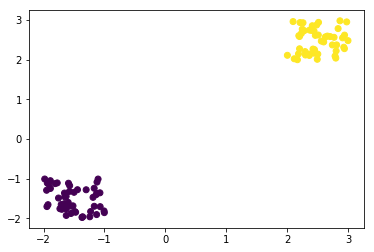

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

创建机器学习模型，训练数据

In [15]:
logistic = LogisticRegression()

In [16]:
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
xmin,xmax = X_train[:,0].min()-0.5,X_train[:,0].max()+0.5
ymin,ymax = X_train[:,1].min()-0.5,X_train[:,1].max()+0.5

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)

X_test = np.c_[xx.ravel(),yy.ravel()]

提取坐标点，对坐标点进行处理

In [18]:
y_ = logistic.predict(X_test)

预测坐标点数据，并进行reshape()

In [19]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r','g','b'])

In [15]:
X_test.shape

(90000, 2)

In [17]:
y_.shape

(90000,)

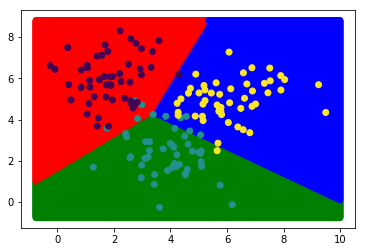

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=cmap)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y1_ = knn.predict(X_test)

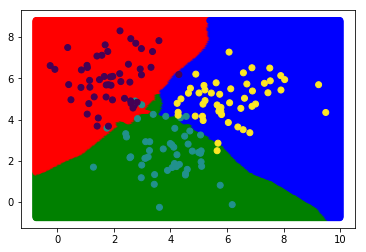

In [24]:
plt.scatter(X_test[:,0],X_test[:,1],c=y1_,cmap=cmap)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

绘制图形

## 3、作业

#### 【第1题】预测年收入是否大于50K美元

读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adult = pd.read_csv('../data/adults.txt')

In [3]:
adult.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [112]:
train = adult[['race','occupation','hours_per_week']].copy()
target = adult['sex']

In [5]:
race_unique = train.race.unique()

def trans_race(x):
    arr = np.eye(train.race.unique().size)
    index = np.argwhere(x == race_unique)[0,0]
    return arr[index]

train['race'] = train['race'].map(trans_race)

In [6]:
train['race']

0        [1.0, 0.0, 0.0, 0.0, 0.0]
1        [1.0, 0.0, 0.0, 0.0, 0.0]
2        [1.0, 0.0, 0.0, 0.0, 0.0]
3        [0.0, 1.0, 0.0, 0.0, 0.0]
4        [0.0, 1.0, 0.0, 0.0, 0.0]
5        [1.0, 0.0, 0.0, 0.0, 0.0]
6        [0.0, 1.0, 0.0, 0.0, 0.0]
7        [1.0, 0.0, 0.0, 0.0, 0.0]
8        [1.0, 0.0, 0.0, 0.0, 0.0]
9        [1.0, 0.0, 0.0, 0.0, 0.0]
10       [0.0, 1.0, 0.0, 0.0, 0.0]
11       [0.0, 0.0, 1.0, 0.0, 0.0]
12       [1.0, 0.0, 0.0, 0.0, 0.0]
13       [0.0, 1.0, 0.0, 0.0, 0.0]
14       [0.0, 0.0, 1.0, 0.0, 0.0]
15       [0.0, 0.0, 0.0, 1.0, 0.0]
16       [1.0, 0.0, 0.0, 0.0, 0.0]
17       [1.0, 0.0, 0.0, 0.0, 0.0]
18       [1.0, 0.0, 0.0, 0.0, 0.0]
19       [1.0, 0.0, 0.0, 0.0, 0.0]
20       [1.0, 0.0, 0.0, 0.0, 0.0]
21       [0.0, 1.0, 0.0, 0.0, 0.0]
22       [0.0, 1.0, 0.0, 0.0, 0.0]
23       [1.0, 0.0, 0.0, 0.0, 0.0]
24       [1.0, 0.0, 0.0, 0.0, 0.0]
25       [1.0, 0.0, 0.0, 0.0, 0.0]
26       [1.0, 0.0, 0.0, 0.0, 0.0]
27       [0.0, 0.0, 1.0, 0.0, 0.0]
28       [1.0, 0.0, 

In [8]:
train.shape

(32561, 3)

In [9]:
occ_unique = train['occupation'].unique()

In [12]:
occ_unique = train.occupation.unique()

def trans_occ(x):
    arr = np.eye(occ_unique.size)
    index = np.argwhere(x == occ_unique)[0,0]
    return arr[index]

train['occupation'] = train['occupation'].map(trans_occ)

In [21]:
train['occupation'].values

array([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       ...,
       array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
      dtype=object)

In [49]:
item1 = train.race[0]
for item in train.race[1:]:
    item1 = np.concatenate((item1,item))

In [60]:
occ1 = train.occupation[0]
for item in train.occupation[1:]:
    occ1 = np.concatenate((occ1,item))

In [59]:
race = item1.reshape(-1,5)

In [61]:
occ = occ1.reshape(-1,15)

In [63]:
occ.shape

(32561, 15)

In [64]:
race.shape

(32561, 5)

In [75]:
hours = train.hours_per_week.values

In [74]:
temp1 = np.hstack((race,occ))

In [81]:
sampels = np.hstack((temp1,hours.reshape(-1,1)))

In [84]:
sampels[:,-1:] = sampels[:,-1:]/sampels[:,-1:].sum()

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(sampels,target,test_size=0.2,random_state=1)

In [100]:
%%time
knn = KNeighborsClassifier(n_neighbors=99)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

Wall time: 5.39 s


In [111]:
%%time
logistic = LogisticRegression(C=1)
logistic.fit(X_train,y_train)
score = logistic.score(X_test,y_test)
print('logistic score is %f'%(score))

logistic score is 0.727468
Wall time: 109 ms


In [113]:
# 使用索引对数据进行映射
race_unique = train.race.unique()
def trans_race(x):
    return np.argwhere(x == race_unique)[0,0]
train['race'] = train['race'].map(trans_race)


occ_unique = train.occupation.unique()
def trans_occ(x):
    return np.argwhere(x == occ_unique)[0,0]
train['occupation'] = train['occupation'].map(trans_occ)

In [115]:
from sklearn.preprocessing import Normalizer

In [116]:
samples = Normalizer().fit_transform(train)

In [119]:
X_train,X_test,y_train,y_test = train_test_split(samples,target,test_size=0.2,random_state=1)

In [122]:
knn = KNeighborsClassifier(n_neighbors=99)
knn.fit(X_train,y_train).score(X_test,y_test)

0.7104253032396745

In [121]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train).score(X_test,y_test)

0.6694303700291724

In [ ]:
# 映射
# 1. 存在大小关系 用数值来进行映射
# 2. 不存在大小关系 用矩阵来进行映射
# 3. 机器学习模型的好坏，很大程度上取决于特征工程的处理
# 

#### 【第2题】从疝气病症预测病马的死亡率

In [148]:
train = pd.read_csv('../data/horseColicTraining.txt',sep='\t',header=None)
test = pd.read_csv('../data/horseColicTest.txt',sep='\t',header=None)

In [149]:
X_train = train.values[:,:21]
y_train = train[21]

In [136]:
X_test = test.values[:,:21]
y_test = test[21]

In [152]:
X_test1 = Normalizer().fit_transform(X_test)
X_train1 = Normalizer().fit_transform(X_train)

In [153]:
knn = KNeighborsClassifier()
knn.fit(X_train1,y_train).score(X_test1,y_test)

0.7164179104477612

In [167]:
logistic = LogisticRegression(C=3)
logistic.fit(X_train1,y_train).score(X_test1,y_test)

0.7313432835820896

In [147]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [154]:
X_train2 = MinMaxScaler().fit_transform(X_train)
X_test2 = MinMaxScaler().fit_transform(X_test)

In [155]:
knn.fit(X_train2,y_train).score(X_test2,y_test)

0.6716417910447762

In [156]:
X_train3 = StandardScaler().fit_transform(X_train)
X_test3 = StandardScaler().fit_transform(X_test)

In [157]:
knn.fit(X_train3,y_train).score(X_test3,y_test)

0.6567164179104478